170508288/170498071 [==============================] - 4s 0us/step


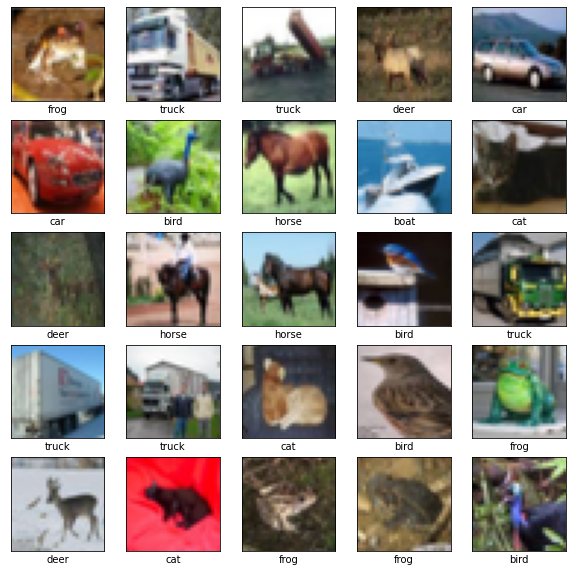

Model: "Model_3_eLU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Flattener (Flatten)   (None, 3072)              0         
                                                                 
 Hidden_Layer_1 (Dense)      (None, 512)               1573376   
                                                                 
 Hidden_Layer_2 (Dense)      (None, 64)                32832     
                                                                 
 Output (Dense)              (None, 10)                650       
                                                                 
Total params: 1,606,858
Trainable params: 1,606,858
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
1563/1563 [==============================] - 46s 29ms/step - loss: 1.8955 - accuracy: 0.3199 - val_loss: 1.9255 - val_accuracy: 0.2846
Epoch 2/20
1563/1563 [=========

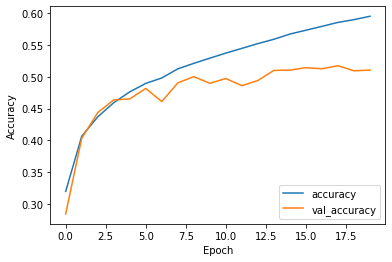

In [2]:
from keras.datasets import cifar10 as c10
from keras import activations as act
from keras import Sequential as seq
from keras import layers as lay
from keras import Input as inp
from keras import Model as mod
from keras import losses as los
from tensorflow import optimizers as opt
import numpy as np
import matplotlib.pyplot as plt

#data is loaded and then uses "assert" tests to make sure
#the tuples have the correct numbers of entries, and shape
#That shape is 5000 entries each of 32x32 images with 3 color values (RGB)
# https://keras.io/api/datasets/cifar10/
(img_train,lbl_train), (img_test,lbl_test) = c10.load_data()
assert img_train.shape == (50000, 32, 32, 3)
assert img_test.shape == (10000, 32, 32, 3)
assert lbl_train.shape == (50000, 1)
assert lbl_test.shape == (10000, 1)

label_names = ["plane", "car", "bird","cat","deer","dog","frog", "horse","boat","truck"]

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(img_train[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    # to access the label numbers as indexes
    # for the label_names array
    plt.xlabel(label_names[lbl_train[i][0]])
plt.show()
"""
Info about the datasets.
Data -- a 10000x3072 numpy array of uint8s. Each row of the array stores a 32x32
  colour image. The first 1024 entries contain the red channel values, the next 
  1024 the green, and the final 1024 the blue. The image is stored in row-major 
  order, so that the first 32 entries of the array are the red channel values of 
  the first row of the image.
Labels -- a list of 10000 numbers in the range 0-9. The number at index i 
  indicates the label of the ith image in the array data.
Label_names -- a 10-element list which gives meaningful names to the numeric 
  labels in the labels array described above. For example, 
  label_names[0] == "airplane", label_names[1] == "automobile", etc.
"""
(img_train,img_test) = (img_train/255 , img_test/255)
# Setting up the model, following the guide for the Sequential model
#  https://keras.io/guides/sequential_model/
model_1 = seq(name = "Model_1_ReLU")
# 32x32 RGB images input = 32x * 32y * (1R+1G+1B)  of dimensions
model_1.add(lay.Flatten(input_shape=(32,32,3),name = "Input_Flattener"))
model_1.add(lay.Dense(128, activation= 'relu', name= "Hidden_Layer_1"))
model_1.add(lay.Dense(10, activation='softmax', name = "Output"))

model_2 = seq(name = "Model_2_TanH")
# 32x32 RGB images input = 32x * 32y * (1R+1G+1B)  of dimensions
model_2.add(lay.Flatten(input_shape=(32,32,3),name = "Input_Flattener"))
model_2.add(lay.Dense(256, activation= 'tanh', name= "Hidden_Layer_1"))
model_2.add(lay.Dense(10, activation='softmax', name = "Output"))

model = seq(name = "Final_Model_Using_eLU")
# 32x32 RGB images input = 32x * 32y * (1R+1G+1B)  of dimensions
model.add(lay.Flatten(input_shape=(32,32,3),name = "Input_Flattener"))
model.add(lay.Dense(512, activation= 'elu', name= "Hidden_Layer_1"))
model.add(lay.Dense(64, activation= 'elu', name= "Hidden_Layer_2"))
model.add(lay.Dense(10, activation='softmax', name = "Output"))

#model_1.summary()
#model_2.summary()
model.summary()
#The Adam optimizer was chosen arbitrarily. There may be better ones for this application
model_1.compile(optimizer = opt.Nadam(learning_rate= 0.001), 
                loss=los.SparseCategoricalCrossentropy(from_logits=False),
                metrics=['accuracy'])
model_2.compile(optimizer = opt.Nadam(learning_rate= 0.001), 
                loss=los.SparseCategoricalCrossentropy(from_logits=False),
                metrics=['accuracy'])
model.compile(optimizer = opt.Nadam(learning_rate= 0.001), 
                loss=los.SparseCategoricalCrossentropy(from_logits=False),
                metrics=['accuracy'])

def plot_hist(history):
  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(loc='lower right')

#history_1 = model_1.fit(img_train, lbl_train, epochs=20, 
#                    validation_data=(img_test, lbl_test))
#test_loss, test_acc = model_1.evaluate(img_test,  lbl_test, verbose=2)


#history_2 = model_2.fit(img_train, lbl_train, epochs=20, 
#                    validation_data=(img_test, lbl_test))
#test_loss, test_acc = model_1.evaluate(img_test,  lbl_test, verbose=2)


history = model.fit(img_train, lbl_train, epochs=20, 
                    validation_data=(img_test, lbl_test))
test_loss, test_acc = model_1.evaluate(img_test,  lbl_test, verbose=2)

plot_hist(history)

'''
Throughout testing these multiiple changes, each one improved the accuracy. In 
the initial 3 models, we tested ReLU, TanH and ELU activations, and ELU turned
out to be the most quick to gain accuracy. ReLU was not far behind, and TanH was
the least effective.
Our initial optimizer was the Adam optimizer, which seemed pretty standard. Our 
initial Loss function was MeanSquaredError. When testing another optimizer and 
loss function, both the Nadam and SparseCategoricalCrossEntropy gave us 
improvements. 
However, the biggest improvements came with the addition of higher node counts 
in our layer, and adding additional layers. In fact, the second layer provided
the biggest jump in accuracy. 
'''